![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Pytorch_logo.png/800px-Pytorch_logo.png)

<h3>Pytorch nn.Module</h3>
In Pytorch the basic template for creating our models is the "Module" class within torch.nn. To create our own class we inherit this class as the "superclass" so that we have access to all the properties and functions. <br>
Lets create our own constructor of this class!

In [1]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

The two main functions we need to create are the <b>\__init__</b> and <b>forward</b> functions. We've already seen <b>\__init__</b> in the Python basic lab so lets looks at the nn.Module <b>forward</b> method <br>

The <b>forward</b> function is the only function that we MUST create when we build our class, Pytorch uses this fuction as the "entry point" to our model and is what is called when we do a forward pass of our model.


In [2]:
# When creating our class we inherit from the nn.Module class
class SimpleFunction(nn.Module):
    """
    Simple implementation of an nn.Module subclass
    Takes the input (x) and returns x * 4 + 2
    """
    def __init__(self):
        # Pass our class and self to superclass and call the superclass's init function
        super(SimpleFunction, self).__init__() 
        
    def forward(self, x):
        return x * 4 + 2

In [3]:
# Create an instance of our class
simple_function = SimpleFunction()

# Perform a "forward pass" of our class
output = simple_function(10)
print("Class output:", output)

# Note we do NOT need to explicitly call the .forward() function of our class,
# A forward pass of our models is such a common step that Pytorch makes it easier and cleaner for us to do

Class output: 42


<h3>A more complicated model </h3><br>
The previous nn.Module class that we created wasn't really a ML "model", lets create something that we've seen before; a simple linear model.

In [4]:
class LinearModel(nn.Module):
    """
    Takes the input (x) and returns x * w^t + b
    """
    def __init__(self, input_size, output_size):
        # Pass our class and self to superclass and call the superclass's init function
        super(LinearModel, self).__init__() 
        
        # nn.Parameter wraps our normal tensors and "tells" Pytorch
        # That they are our nn.Module's model parameters to be optimized 
        # nn.Parameter has the requires grad flag set to True by default
        self.w = nn.Parameter(torch.randn(output_size, input_size))
        self.b = nn.Parameter(torch.randn(1, output_size))

    def forward(self, x):
        return torch.matmul(x,  self.w.t()) + self.b

In [5]:
#Create a batch of 10 datapoints each 5D
input_data = torch.randn(10, 5)

#Create an instance of our Model
linear_model = LinearModel(5, 1)

#Perform a forward pass!
output = linear_model(input_data)

print(output.shape)
print(output.flatten().detach())
#Note: detach "disconnects" the tensor and returns it with no history of previous calculations

torch.Size([10, 1])
tensor([ 1.5441, -3.0013,  1.6398, -0.6869,  3.3365, -1.6435,  0.0373,  3.9717,
         5.0784,  5.5072])


<h3>Pytorch inbuilt Neural Network Layers</h3>
This "Linear layer" is so common that Pytorch already has an implementation of it, in fact Pytorch has implementations of most Layer types which act as building blocks for our multi-layer models. For now lets just see how we can implement Pytorch's linear layer (we will see may more layer types later in the semester!).<br>
<b>Things to know!</b><br>
- Pytorch initialises the weights and biases of it's layers in very particular ways (not just from a normal distribution!), usualy based off of deep learning research, see the documentation for more details.<br>
- Pytorch includes a bias term in it's layers by default.

In [6]:
# Build a linear layer aka a "fully connected" layer aka a "Perceptron" layer
# nn.Linear(Number of inputs, Number of outputs) 
linear = nn.Linear(3, 1) 

# Lets have a look at the parameters of this layer
# The "weights" are what is multipied by the input data
print ('w:\n', linear.weight.data)

# The bias is then added on!
print ('b:\n', linear.bias.data)

print ('w shape:\n', linear.weight.data.shape)
print ('b shape:\n', linear.bias.data.shape)

# Note: .data just gives us the raw Tensor without any connection to the computational graph
# - it looks nicer when we print it out

# Note: The opperation the linear layer performs is y = x*A^t + b
# Where A^t is the transpose of the weights and b is the bias,
# This opperation is also know as an "affine transformation"

w:
 tensor([[-0.1881,  0.2730,  0.1149]])
b:
 tensor([-0.4289])
w shape:
 torch.Size([1, 3])
b shape:
 torch.Size([1])


In [7]:
# Lets have a look at the gradients of these parameters
print ('w:\n', linear.weight.grad)
print ('b:\n', linear.bias.grad)
# Note: Pytorch initialises the grad of the tensors to "None" NOT 0!
# They only get created after the first backwards pass.

w:
 None
b:
 None


In [8]:
# Create a random data input tensor
data = torch.randn(100, 3)
# Create some noisey target data
target = data.sum(1, keepdims=True) + 0.01 * torch.randn(data.shape[0], 1)

print ('Input data:\n', data[:10])
print ('Output data:\n', target[:10])

Input data:
 tensor([[ 1.3363e+00,  7.0958e-01, -8.0562e-01],
        [ 2.6530e-01, -6.1266e-01,  1.2046e+00],
        [ 2.5554e-01,  8.2913e-01,  1.7726e+00],
        [ 2.0308e+00,  2.5894e-01,  1.0717e+00],
        [-1.4755e+00, -4.8374e-03, -1.0664e-01],
        [-7.1975e-01,  4.3406e-01, -6.3525e-01],
        [ 4.3767e-01,  1.6219e+00, -5.4075e-01],
        [-2.6108e-01,  1.2305e+00,  7.1837e-01],
        [-1.5305e-03,  9.9832e-01, -5.7759e-01],
        [-6.1890e-02,  7.3816e-02, -2.2135e-01]])
Output data:
 tensor([[ 1.2585],
        [ 0.8631],
        [ 2.8607],
        [ 3.3627],
        [-1.5810],
        [-0.9117],
        [ 1.5078],
        [ 1.7032],
        [ 0.4091],
        [-0.2031]])


Now that everything is set up, lets perform a "forward pass" of our model, aka let's put the data into the model and see what comes out.

In [9]:
# Remember! To perform a forward pass of our model, we just need to "call" our network
# Pytorch's nn.Module class will automatically pass it to the "forward" function in the layer class
target_pred = linear(data)

print("Network output:\n", target_pred.data[:10])
print("Network output shape:", target_pred.shape)

Network output:
 tensor([[-0.5791],
        [-0.5077],
        [-0.0469],
        [-0.6171],
        [-0.1649],
        [-0.2479],
        [-0.1305],
        [ 0.0388],
        [-0.2224],
        [-0.4225]])
Network output shape: torch.Size([100, 1])


<h3>Loss Functions and Optimizers</h3>
Now lets see how Pytorch helps us optimize our model!<br>
<b>Loss functions</b><br>
We've already seen loss function's before and defined our own, but using Pytorch we can pick from pre-defined functions - Pytorch has MANY Loss function already created and optimized (though we can also just create our own).

<b>Optimizers</b><br>
This is the object that will be doing the parameter updates for us! Pytorch has a number of different optimizers, some of which we will explore in future labs. For now we will just use our well known Gradient Descent (GD) optimizer.<br>
Note: Most optimizers are just some variant of GD

In [10]:
# Lets perform a regression with a mean square error loss
loss_function = nn.MSELoss()

# Lets create a Stochastic gradient descent optimizer with a learning rate of 0.01
# (the way we will be using it, it is just normal GD) 
# When we create the optimizer we need to tell it WHAT it needs to optimize, so the first thing 
# We pass it are the linear layer's "parameters"
# We also need to pass a learning rate (lr)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01) 

We can see from the following scatter plot that the output of our model is NOT the same as our target data, let's see what the MSE loss is.

Text(0, 0.5, 'Ouputs')

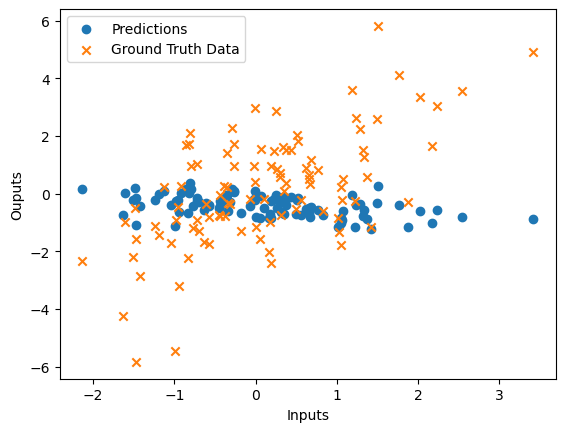

In [11]:
# Plotting the first dimension of the input vs the output

# Use the outputs of the model from a few cells ago
plt.scatter(data[:, 0], target_pred.detach())

# Use the Ground Truth data
plt.scatter(data[:, 0], target, marker="x")
plt.legend(["Predictions", "Ground Truth Data"])
plt.xlabel("Inputs")
plt.ylabel("Ouputs")

In [12]:
loss = loss_function(target_pred, target)
print('loss:', loss.item())

loss: 3.710970163345337


Lets perform a backward pass of our model to compute the gradients!

In [13]:
# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# Note for every backwards pass of the model we must first perform a forward pass
# as data from parts of the computational graph have been deleted upon the backward pass to save memory.
# We can tell Pytorch to hold onto this data, but, in many cases it needs to be recalculated anyway

dL/dw:  tensor([[-2.9612, -2.1535, -2.0563]])
dL/db:  tensor([-1.1952])


Now, finally, tell the optimizer to perform an update step!

In [14]:
# The critical step to update the parameter which reduce the loss
optimizer.step()

# Perform another forward pass of the model to check the new loss
target_pred = linear(data)
loss = loss_function(target_pred, target)
print('loss after 1 step optimization: ', loss.item())

loss after 1 step optimization:  3.522804021835327


<h3>The Training Loop</h3>
Our loss has gone down!! Lets see how low we can get it to go by constructing a training loop!<br>
For MOST tasks (but not all) a single training iteration in Pytorch can be summarised in the following 5 steps:<br>
- Forward pass of our model with the data.<br>
- Calculate the loss.<br>
- Reset the current stored gradients to 0<br>
- Backpropagate the loss to calculate the new gradients.<br>
- Perform an optimization step.<br>
<br>
We perform these steps over and over until our model has converged or some other point has been reached (depending on the application)

In [15]:
# Lets create an empty array to log the loss
loss_logger = []

# Perform 1000 itterations of our dataset
for i in range(1000):
    # Perform a forward pass of our data
    target_pred = linear(data)
    
    # Calculate the loss
    loss = loss_function(target_pred, target)
    
    # .zero_grad sets the stored gradients to 0
    # If we didn't do this they would be added to the 
    # Gradients from the previous step!
    optimizer.zero_grad()
    
    # Calculate the new gradients
    loss.backward()
    
    # Perform an optimization step!
    optimizer.step()

    loss_logger.append(loss.item())
    
print("loss:", loss.item())

loss: 0.00010064560774480924


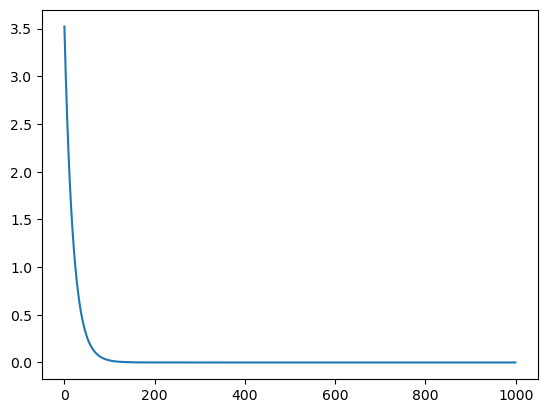

In [16]:
plt.plot(loss_logger)

Text(0, 0.5, 'Ouputs')

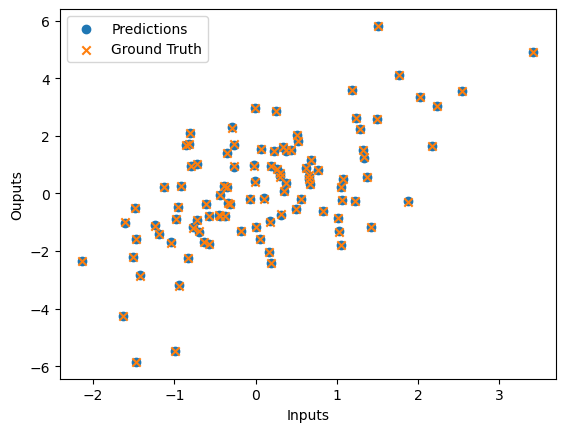

In [17]:
#Plotting the first dimension of the input vs the output
plt.scatter(data[:, 0], target_pred.detach())
plt.scatter(data[:, 0], target, marker="x")
plt.legend(["Predictions", "Ground Truth"])
plt.xlabel("Inputs")
plt.ylabel("Ouputs")

<h2>Wohoo! We trained our first Pytorch neural network!!<h2>